# CS6140 Assignments

**Instructions**
1. In each assignment cell, look for the block:
 ```
  #BEGIN YOUR CODE
  raise NotImplementedError.new()
  #END YOUR CODE
 ```
1. Replace this block with your solution.
1. Test your solution by running the cells following your block (indicated by ##TEST##)
1. Click the "Validate" button above to validate the work.

**Notes**
* You may add other cells and functions as needed
* Keep all code in the same notebook
* In order to receive credit, code must "Validate" on the JupyterHub server

---

In [20]:
require './assignment_lib'

#Initializes the database used for this assignment
dir = "/home/dataset"
$dev_db = SQLite3::Database.new "#{dir}/credit_risk_data_dev.db", results_as_hash: true, readonly: true

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected string constant
1: require './assignment_lib'
            ^


## Final Project: Part 2 - Optional: Use R to analyze data

You may find it easier to visualize and analyze data in R. Use the assignment notebook [part-2](part-2.ipynb) to extract a dataset into TSV using ```export_to_tsv```. Then, do some extra processing here. When you are ready, go back to  [part-2](part-2.ipynb) and implement any features you need in the notebook.


**NOTE** This notebook is NOT graded!


In [21]:
X = read.delim("part-2-random-sample.tsv", header = TRUE, sep = "\t")
X[1:5,]

,id,label,amt_credit,amt_income_total,code_gender,commonarea_avg,days_birth,ext_source_1,ext_source_2,ext_source_3,flag_emp_phone,flag_mobil,flag_own_car,flag_own_realty,name_education_type,name_family_status,name_housing_type,name_income_type,organization_type,own_car_age
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,100002,1,406597.5,202500.00,M,0.0143,-9461,0.08303697,0.2629486,0.1393758,1,1,N,Y,Secondary / secondary special,Single / not married,House / apartment,Working,Business Entity Type 3,NA
2,100015,0,148365.0,38419.15,F,NA,-20417,0.72204445,0.5551832,0.6528966,0,1,N,Y,Secondary / secondary special,Married,House / apartment,Pensioner,XNA,NA
3,100025,0,1132573.5,202500.00,F,NA,-14815,0.43770902,0.2337670,0.5424451,1,1,Y,Y,Secondary / secondary special,Married,House / apartment,Commercial associate,Trade: type 7,14
4,100068,0,247500.0,81000.00,M,0.0029,-18248,0.23771972,0.6091353,0.5136938,1,1,N,Y,Secondary / secondary special,Married,House / apartment,Working,Security,NA
5,100120,0,781920.0,135000.00,F,NA,-9650,0.25435166,0.1699530,0.1214083,1,1,N,N,Higher education,Married,House / apartment,Working,Government,NA


### Train Logistic Regression in R
The ```glm``` function trains logistic regression and other linear models.

See ```help(glm)``` for more details. 

In [2]:
f = glm(label > 0 ~ name_family_status, data = X, family = binomial())
summary(f)


Call:
glm(formula = label > 0 ~ name_family_status, family = binomial(), 
    data = X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4465  -0.3863  -0.3790  -0.3790   2.3272  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            -2.26761    0.13131 -17.269   <2e-16 ***
name_family_statusMarried              -0.32967    0.14452  -2.281   0.0225 *  
name_family_statusSeparated            -0.29011    0.22564  -1.286   0.1986    
name_family_statusSingle / not married  0.01203    0.16887   0.071   0.9432    
name_family_statusWidow                -0.37145    0.29778  -1.247   0.2122    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3567.8  on 6640  degrees of freedom
Residual deviance: 3556.9  on 6636  degrees of freedom
AIC: 3566.9

Number of Fisher Scoring iterations: 5


### Target averaging in R

Use the ```aggregate``` function to calculate the averages

In [3]:
avg_name_family_status = aggregate(label ~ name_family_status, X, mean)

avg_name_family_status

p = avg_name_family_status[X[,'name_family_status'],'label']
X[,'avg_name_family_status'] = p

name_family_status,label
<fct>,<dbl>
Civil marriage,0.09384164
Married,0.06931391
Separated,0.07191011
Single / not married,0.09486931
Widow,0.06666667


### Sample dataset
Create a sample dataset with two normal distributions, used in class

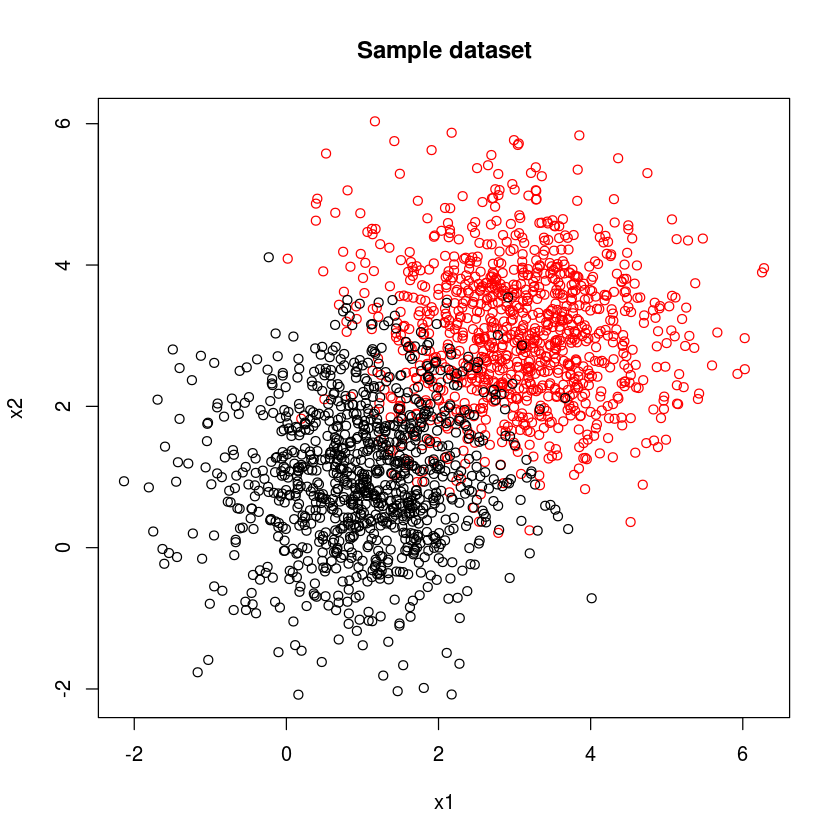

In [4]:
TPos = data.frame(x1 = rnorm(1000, mean = 3, sd = 1), x2 = rnorm(1000, mean = 3, sd = 1)) 
TNeg = data.frame(x1 = rnorm(1000, mean = 1, sd = 1), x2 = rnorm(1000, mean = 1, sd = 1))

T = data.frame(x1 = rnorm(2000, mean = 1, sd = 1), x2 = rnorm(2000, mean = 1, sd = 1), label = 1:2000)
T[1:1000,1:2] = TPos
T[1:1000, 'label'] = 1

T[1001:2000,1:2] = TNeg
T[1001:2000,'label'] = 0

plot(T[,'x1'], T[,'x2'], col = T[,'label'] + 1, 
     main = "Sample dataset", xlab = "x1", ylab = "x2")

### Plot a histogram

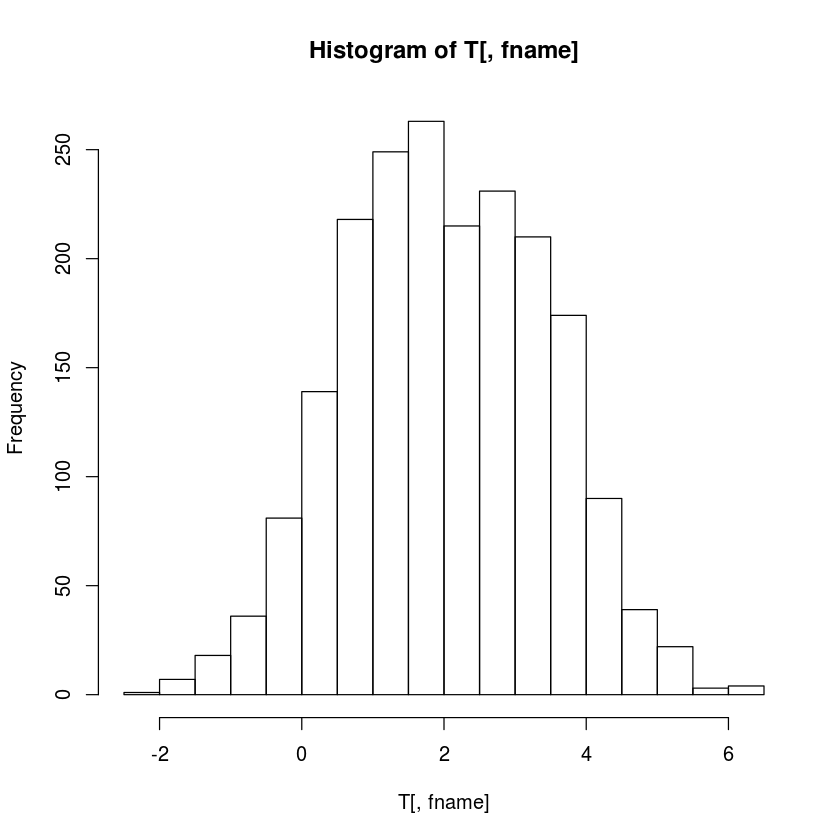

In [5]:
fname = 'x1'
hTotal = hist(T[,fname], breaks = 20, plot = TRUE, freq = TRUE)

In [6]:
hTotal

$breaks
 [1] -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5
[16]  5.0  5.5  6.0  6.5

$counts
 [1]   1   7  18  36  81 139 218 249 263 215 231 210 174  90  39  22   3   4

$density
 [1] 0.001 0.007 0.018 0.036 0.081 0.139 0.218 0.249 0.263 0.215 0.231 0.210
[13] 0.174 0.090 0.039 0.022 0.003 0.004

$mids
 [1] -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25  2.75  3.25
[13]  3.75  4.25  4.75  5.25  5.75  6.25

$xname
[1] "T[, fname]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

### Class-conditional histograms

In [7]:
#feature values for each class
xPos = T[T[,'label'] > 0, fname]
xNeg = T[T[,'label'] <= 0, fname]
hNeg = hist(xNeg, breaks = hTotal$breaks, plot = FALSE)
hPos = hist(xPos, breaks = hTotal$breaks, plot = FALSE)

### Calculate probability distributions
Using the parameters of the histogram, we can calculate per-feature probability distributions

In [8]:
x_values = hTotal$mids
p_x_neg = hNeg$counts / length(xNeg)
p_neg = length(xNeg) / (length(xNeg) + length(xPos))
p_x_pos = hPos$counts / length(xPos)
p_pos = length(xPos) / (length(xNeg) + length(xPos))

p_x = p_x_pos * p_pos + p_x_neg * p_neg + 1e-4
p_pos_x = p_x_pos * p_pos / p_x
p_neg_x = p_x_neg * p_neg / p_x

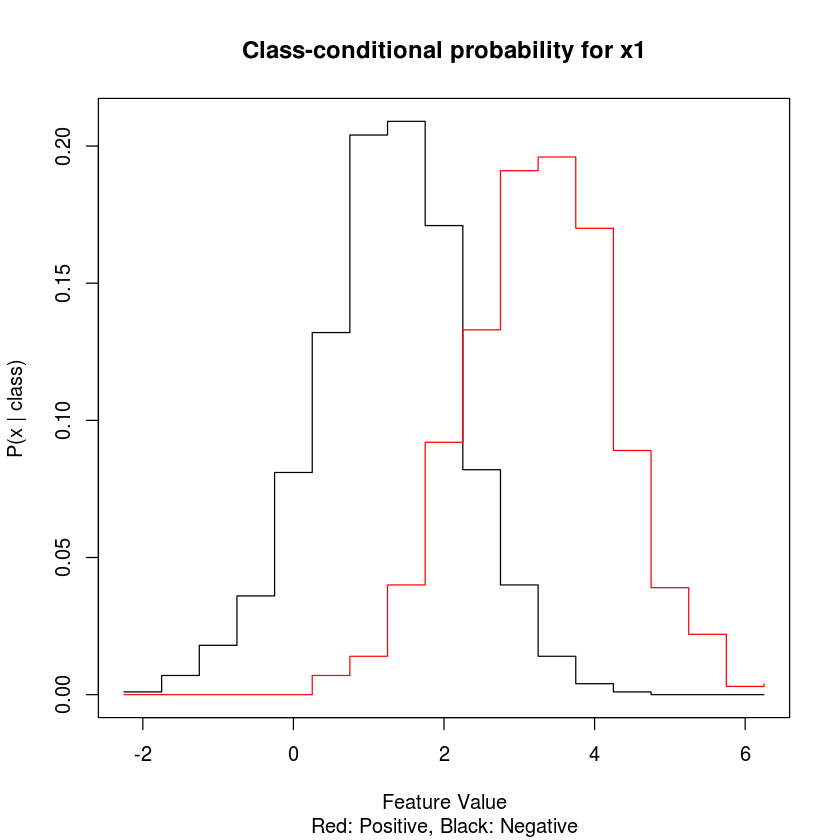

In [9]:
plot(x_values, p_x_neg, main = 'Class-conditional probability for x1', 
     xlab = 'Feature Value', 
     ylab = 'P(x | class)',
     ylim = c(0, max(c(p_x_neg, p_x_pos))),
     sub = 'Red: Positive, Black: Negative', type = 's')
lines(x_values, p_x_pos , col = 'red', type = 's')

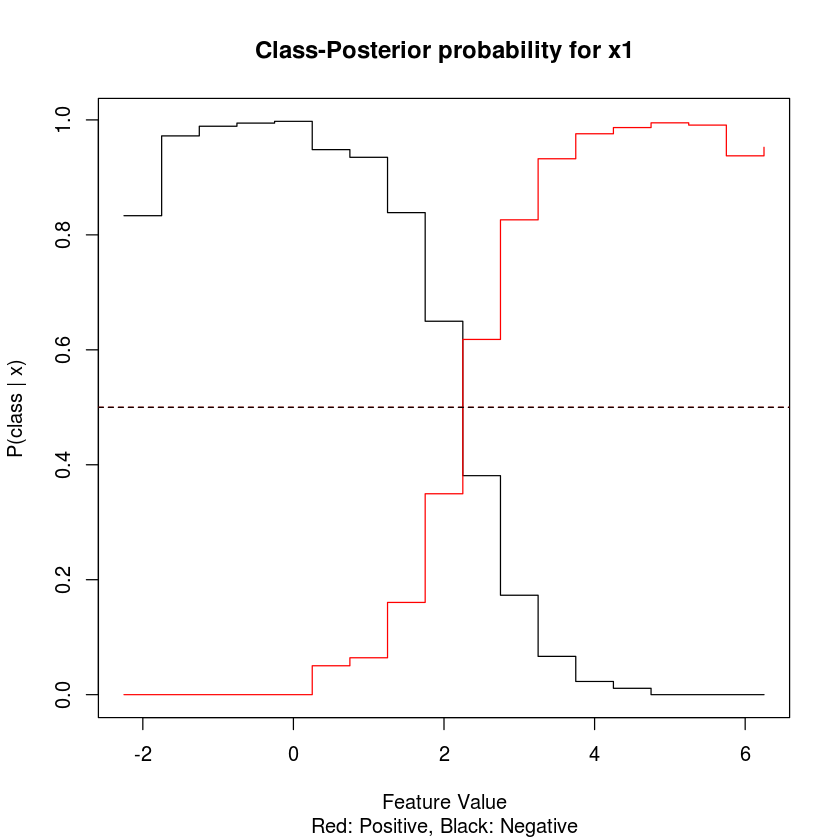

In [10]:
plot(x_values, p_neg_x, main = 'Class-Posterior probability for x1', 
     xlab = 'Feature Value', 
     ylab = 'P(class | x)',
     ylim = c(0, max(c(p_neg_x, p_pos_x))),
     sub = 'Red: Positive, Black: Negative', type = 's')
lines(x_values, p_pos_x , col = 'red', type = 's')
abline(h = p_pos, lty = 'dashed', col = 'red')
abline(h = p_neg, lty = 'dashed', col = 'black')

### ECDFs for all data and class-conditional

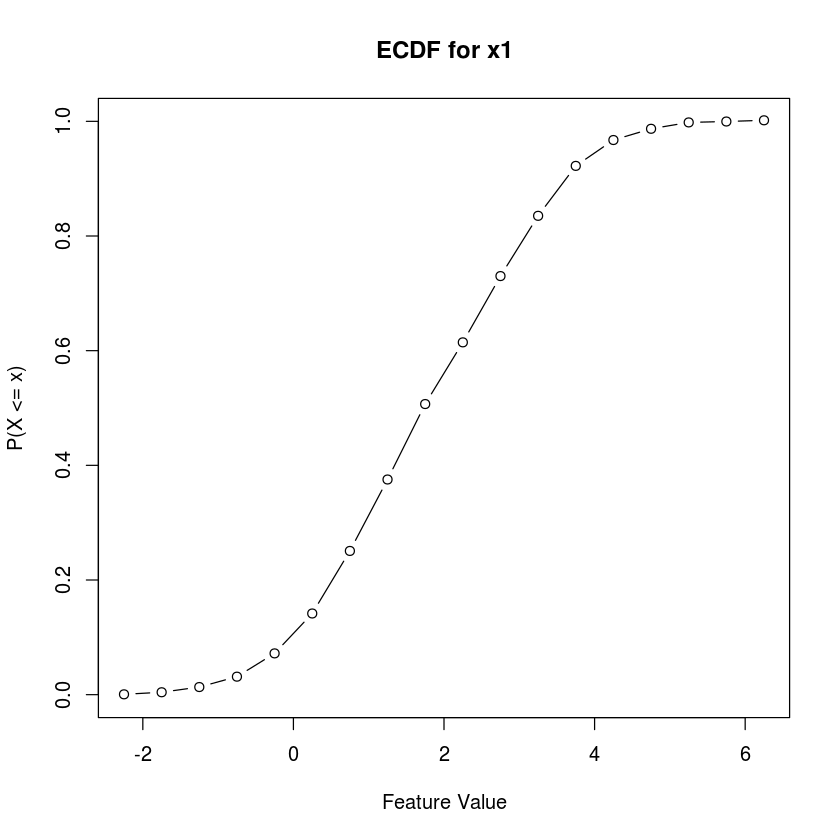

In [11]:
plot(x_values, cumsum(p_x), main = 'ECDF for x1', 
     xlab = 'Feature Value', 
     ylab = 'P(X <= x)',
     ylim = c(0, 1), type = 'b')

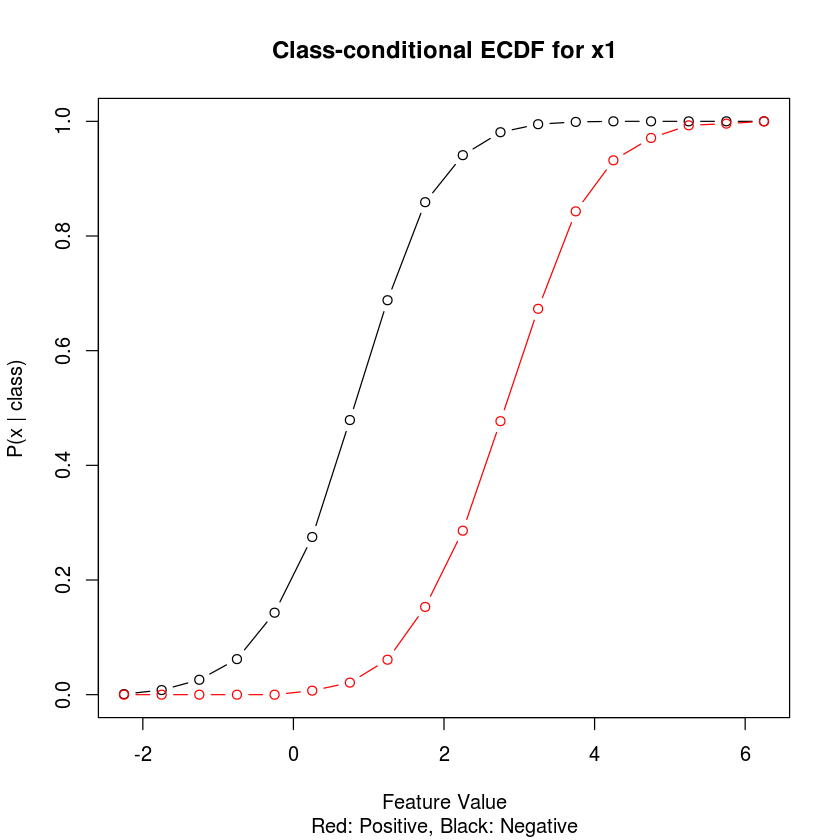

In [12]:
plot(x_values, cumsum(p_x_neg), main = 'Class-conditional ECDF for x1', 
     xlab = 'Feature Value', 
     ylab = 'P(x | class)',
     ylim = c(0, 1),
     sub = 'Red: Positive, Black: Negative', type = 'b')
lines(x_values, cumsum(p_x_pos) , col = 'red', type = 'b')

### Entropy
Here is how to write a function in R to calculate entropy for the class distribution.

In [13]:
class_counts = c(sum(1 - X[,'label']), sum(X[,'label']))
class_distribution = class_counts / sum(class_counts)
class_distribution

entropy = function(counts) {
    s = sum(counts)
    if (s == 0.0) {
        entropy = 0.0
    }
    dist = counts / s
    entropy = -sum(na.exclude(dist * log(dist)))    
}

e = entropy(class_distribution)
e

[1] 0.92410782 0.07589218

[1] 0.2686202

# ROC

Build a simple classifier for the feature and use it as a classifier. Uses the ```glm``` function for logistic regression. For demonstration purposes only, we are using the training set to calculate the ROC.

In [14]:
#Sort dataset by the feature value
f = glm(label ~ ext_source_1, data = X, family = binomial())
summary(f)


Call:
glm(formula = label ~ ext_source_1, family = binomial(), data = X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7063  -0.4489  -0.3468  -0.2680   2.7868  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.1990     0.1038  -11.55   <2e-16 ***
ext_source_1  -2.9345     0.2364  -12.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3567.8  on 6640  degrees of freedom
Residual deviance: 3400.5  on 6639  degrees of freedom
AIC: 3404.5

Number of Fisher Scoring iterations: 6


In [15]:
#Sort dataset by the feature value
f = glm(label > 0 ~ ext_source_1, data = X, family = binomial())
summary(f)




Call:
glm(formula = label > 0 ~ ext_source_1, family = binomial(), 
    data = X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7063  -0.4489  -0.3468  -0.2680   2.7868  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.1990     0.1038  -11.55   <2e-16 ***
ext_source_1  -2.9345     0.2364  -12.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3567.8  on 6640  degrees of freedom
Residual deviance: 3400.5  on 6639  degrees of freedom
AIC: 3404.5

Number of Fisher Scoring iterations: 6


In [16]:
#Draw ROC Curve
plot_roc = function(scores, labels, main, sub) {
    i = order(scores, decreasing = TRUE)
    labels = labels[i]
    
    fpr = cumsum(1 - labels) / sum(1 - labels)
    tpr = cumsum(labels) / sum(labels)

    plot(fpr, tpr, main = main, sub = sub, 
         xlab = "False Positive Rate",
         ylab = "True Positive Rate", type = 'l'
        )
    abline(0,1, lty = 'dashed', col = 'gray')
}

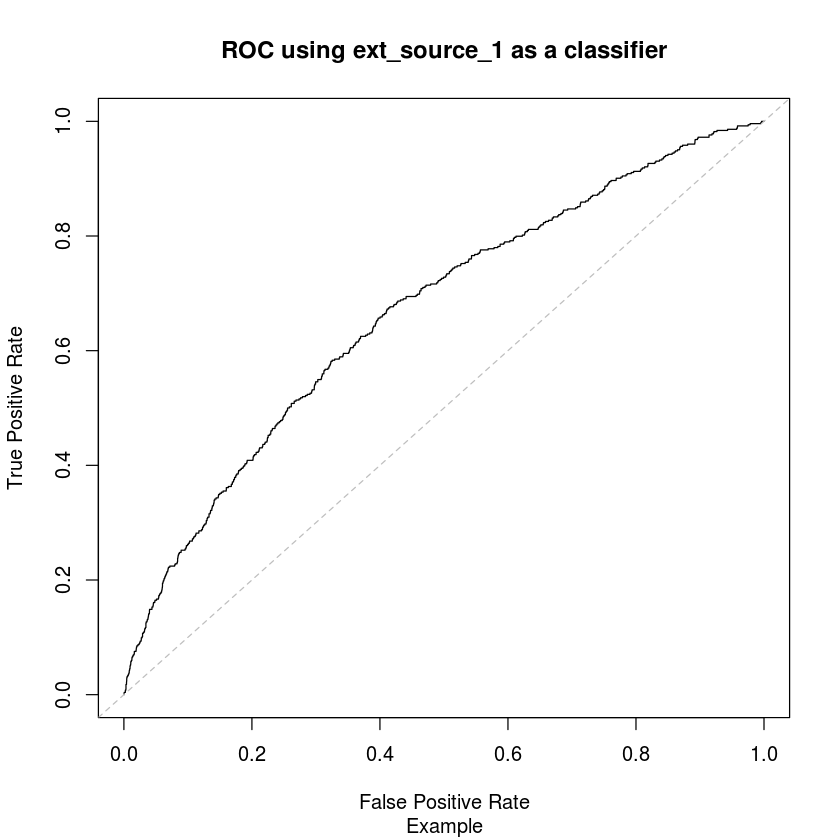

In [17]:
scores = predict(f, newdata = X, type = 'response')
plot_roc(scores, X[,'label'], "ROC using ext_source_1 as a classifier", "Example")

### Correlation matrix

Find features correlated with the label and uncorrelated with each other.

In [18]:
cor(X[,c('label', 'ext_source_1', 'ext_source_2', 'amt_credit', 'amt_income_total')])

,label,ext_source_1,ext_source_2,amt_credit,amt_income_total
label,1.00000000,-0.15701088,NA,-0.02020357,-0.01184742
ext_source_1,-0.15701088,1.00000000,NA,0.18069809,0.08948217
ext_source_2,NA,NA,1,NA,NA
amt_credit,-0.02020357,0.18069809,NA,1.00000000,0.37756721
amt_income_total,-0.01184742,0.08948217,NA,0.37756721,1.00000000
